Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [7]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("diabetes.csv")
#1
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

#2
df = df.fillna(df.mean(numeric_only=True))

#3
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

np.random.seed(1)
indices = np.random.permutation(len(df))

train_size = int(0.7 * len(df))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

#4
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def predict_one(x, k=3):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(x, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_neighbors = [label for _, label in distances[:k]]

    return max(set(k_neighbors), key=k_neighbors.count)

def predict_all(X_test, k=3):
    predictions = []
    for x in X_test:
        predictions.append(predict_one(x, k))
    return predictions

y_pred = predict_all(X_test, k=3)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(" Original Accuracy:", accuracy)


Saving diabetes.csv to diabetes (1).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    in

Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [8]:

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_scaled = (X - X_mean) / X_std

X_train_scaled = X_scaled[train_idx]
X_test_scaled = X_scaled[test_idx]

def predict_one_scaled(x, k=3):
    distances = []
    for i in range(len(X_train_scaled)):
        dist = euclidean_distance(x, X_train_scaled[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_neighbors = [label for _, label in distances[:k]]
    return max(set(k_neighbors), key=k_neighbors.count)

def predict_all_scaled(X_test_scaled, k=3):
    predictions = []
    for x in X_test_scaled:
        predictions.append(predict_one_scaled(x, k))
    return predictions

y_pred_scaled = predict_all_scaled(X_test_scaled, k=3)
accuracy_scaled = np.sum(y_pred_scaled == y_test) / len(y_test)

print(" Scaled Accuracy", accuracy_scaled)



 Scaled Accuracy 0.7489177489177489


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

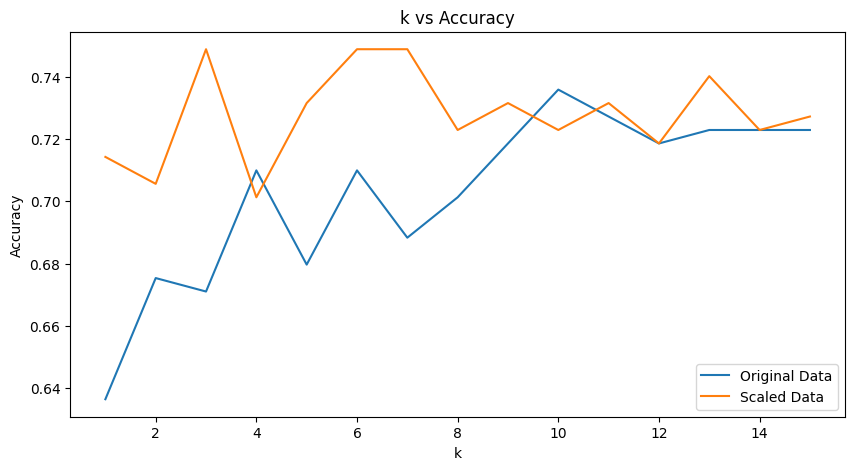

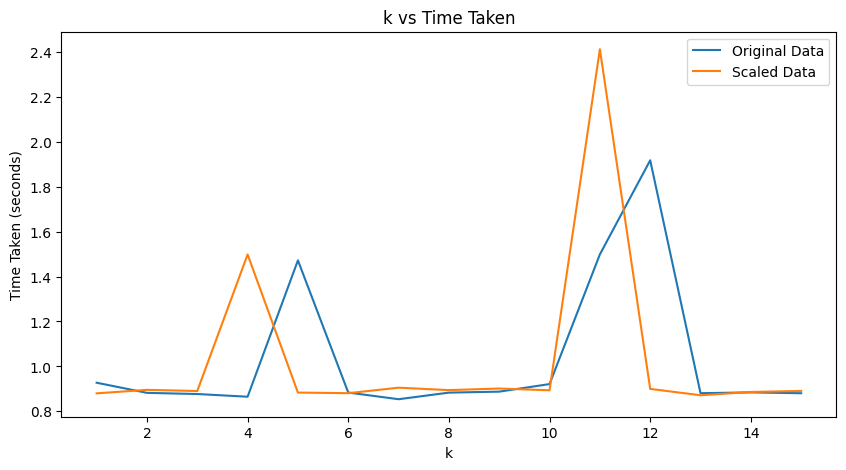

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 16)

accuracy_original_list = []
time_original_list = []

accuracy_scaled_list = []
time_scaled_list = []

def timed_prediction(X_test_data, predict_func):
    start = time.time()
    preds = predict_func(X_test_data)
    end = time.time()
    return preds, (end - start)

for k in k_values:

    def predict_all_k_original(X_test):
        preds = []

        for x in X_test:
            preds.append(predict_one(x, k=k))
        return preds

    y_pred_original, t_original = timed_prediction(X_test, predict_all_k_original)
    acc_original = np.sum(y_pred_original == y_test) / len(y_test)

    accuracy_original_list.append(acc_original)
    time_original_list.append(t_original)

    def predict_all_k_scaled(X_test_scaled):
        preds = []
        for x in X_test_scaled:
            preds.append(predict_one_scaled(x, k=k))
        return preds

    y_pred_scaled, t_scaled = timed_prediction(X_test_scaled, predict_all_k_scaled)
    acc_scaled = np.sum(y_pred_scaled == y_test) / len(y_test)

    accuracy_scaled_list.append(acc_scaled)
    time_scaled_list.append(t_scaled)

plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_original_list, label="Original Data")
plt.plot(k_values, accuracy_scaled_list, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_values, time_original_list, label="Original Data")
plt.plot(k_values, time_scaled_list, label="Scaled Data")
plt.xlabel("k")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.show()
